# Linear Regression

In [3]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

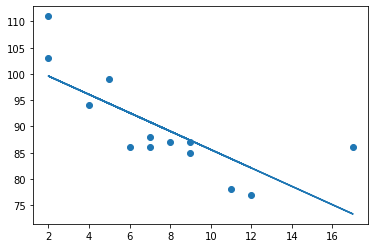

In [2]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope,intercept,r,p,std_err=stats.linregress(x,y)

def myfunc(x):
    return slope*x+intercept

mymodel=list(map(myfunc,x))

plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

# polynomial regression

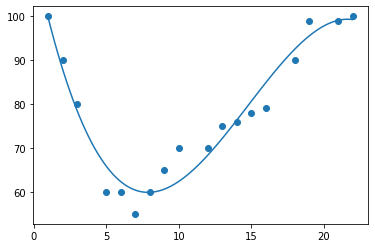

In [8]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel=np.poly1d(np.polyfit(x,y,3))

myline=np.linspace(1,22,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

# R squared

In [9]:
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


# predicting

In [10]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel=np.poly1d(np.polyfit(x,y,3))

speed=mymodel(17)
print(speed)

88.87331269698001


# Bad Fit

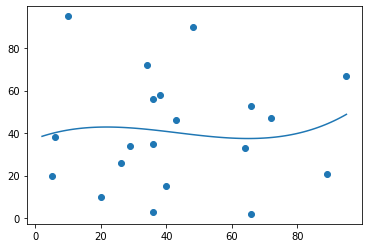

In [12]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [13]:
# as this is a bad fir we can expect very less r2_score too, which shows that there is no strong relation between the data
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.009952707566680652


# Multiple Regression

In [16]:
import pandas as pd
df=pd.read_csv("data (1).csv")

X=df[['Weight','Volume']]
y=df['CO2']

In [18]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [20]:
predictedCO2 = regr.predict([[2300, 1300]])
print(predictedCO2)

[107.2087328]


c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# coefficient

In [21]:
print(regr.coef_)
#this says the relation between the vairables so if we increase independent vairable , how the dependent vairable changes is given by this

[0.00755095 0.00780526]


In [22]:
# lets check the relation
predictedCO2 = regr.predict([[3300, 1300]])
print(predictedCO2)

[114.75968007]


c:\Users\91965\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Scaling

In [3]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

df=pd.read_csv("data (1).csv")

X=df[['Weight','Volume']]
scaledX=scale.fit_transform(X)
print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [ ]:
y=df['CO2']
regr=linear_model.LinearRegression()
regr.fit(scaledX,y)

scaled=scale.transform([[2300,1.3]])

predictedCO2=regr.predict[scaled[0]]
print(predictedCO2)

# Train/Test

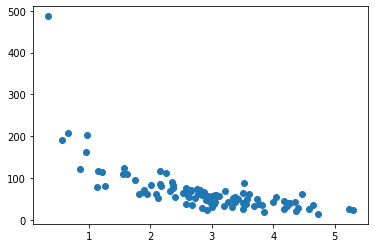

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

x=np.random.normal(3,1,100)
y=np.random.normal(150,40,100)/x

plt.scatter(x,y)
plt.show()


In [11]:
# splitting into train and test data
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

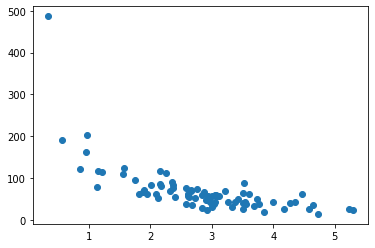

In [12]:
# visualzie train data
plt.scatter(train_x,train_y)
plt.show()

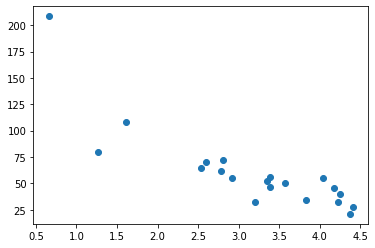

In [13]:
# visualize the test data
plt.scatter(test_x,test_y)
plt.show()

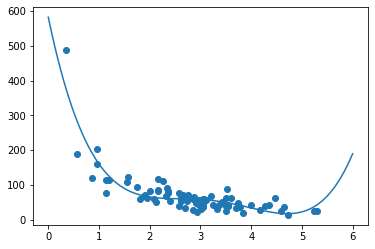

In [14]:
# fitting the dataset
mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))
myline = np.linspace(0, 6, 100)

plt.scatter(train_x,train_y)
plt.plot(myline,mymodel(myline))
plt.show()

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(train_y, mymodel(train_x))
print(r2)

0.7988645544629797


In [20]:
import numpy as np
from sklearn.metrics import r2_score
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343581


In [21]:
print(mymodel(5))

22.87962591811811
